In [1]:
from simulation import get_agent_working_result, estimate_results, Generator_of_desired_PR
import matplotlib.pyplot as plt
from network_arch import Agent
import numpy as np

In [2]:
agent = Agent()


In [3]:

def apply_solution(solution, Generator_of_desired_PR = Generator_of_desired_PR):

    agent.updateParams(solution)

    [total_Production_in_dinamics,
     desired_total_Production_in_dinamics,
     Production_Error_in_dinamics,

     total_cost_of_work_for_elecs,
     total_run_out_for_elecs,

     Outs,
     Temperatures,
     States,
     Targets,
     switch_nums_for_elecs,
     Control_signals,

     Output_derivative_for_elecs,
     Output_dderivative_for_elecs] = get_agent_working_result(agent, Generator_of_desired_PR = Generator_of_desired_PR)

    return [Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals]


In [4]:
param_count = 0
for param in agent.model.parameters():
  print(param.data.shape)
  param_count += np.product(param.data.shape)
print(param_count)

torch.Size([50, 99])
torch.Size([50])
torch.Size([50, 50])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
8060


In [5]:
random_solution = np.random.rand(8060,1) * 6 - 3

In [6]:
import pickle

In [11]:
file_params = open('serialised_data_CMAES_MarkovDelta_t/best_params_relu_linear_norm_2out.pkl', 'rb')
best_params = pickle.load(file_params)
file_params.close()

In [12]:
%%time

[Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals] = apply_solution(best_params)

[neg_J, RMSE, mean_error, asymetric_error, max_total_run_out, run_out_deviation_RMSE] = estimate_results([Production_Error_in_dinamics, total_run_out_for_elecs])

print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(RMSE))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(switch_nums_for_elecs)
print(sum(switch_nums_for_elecs))

# base 1
# neg_J = -31.98837982620066
# RMSE = 84.14656138601038
# mean_error = 17.816127479507852
# asymetric_error = 15.035487517321158
# max_total_run_out = 149936.400000058
# run_out_deviation_RMSE = 36929.29534660757
# switc num =  [27 26 22 15  9]
# 99

# random
# neg_J = -103.309610812555
# RMSE = 194.4250864243566
# mean_error = 71.93856692606188
# asymetric_error = 207.04951446530922
# max_total_run_out = 128123.50000003184
# run_out_deviation_RMSE = 50485.59960927636
# switc num =  [23  1  0 18  7]
# 49


=========================== SCORE
neg_J = -84.93103071934945
RMSE = 181.28180136727568
mean_error = 60.055066097627645
asymetric_error = 144.38275845368022
max_total_run_out = 61663.999999983884
run_out_deviation_RMSE = 21832.930921551015
switc num =  [11  1  1  1  1]
15
CPU times: user 2.5 s, sys: 19.2 ms, total: 2.51 s
Wall time: 2.54 s


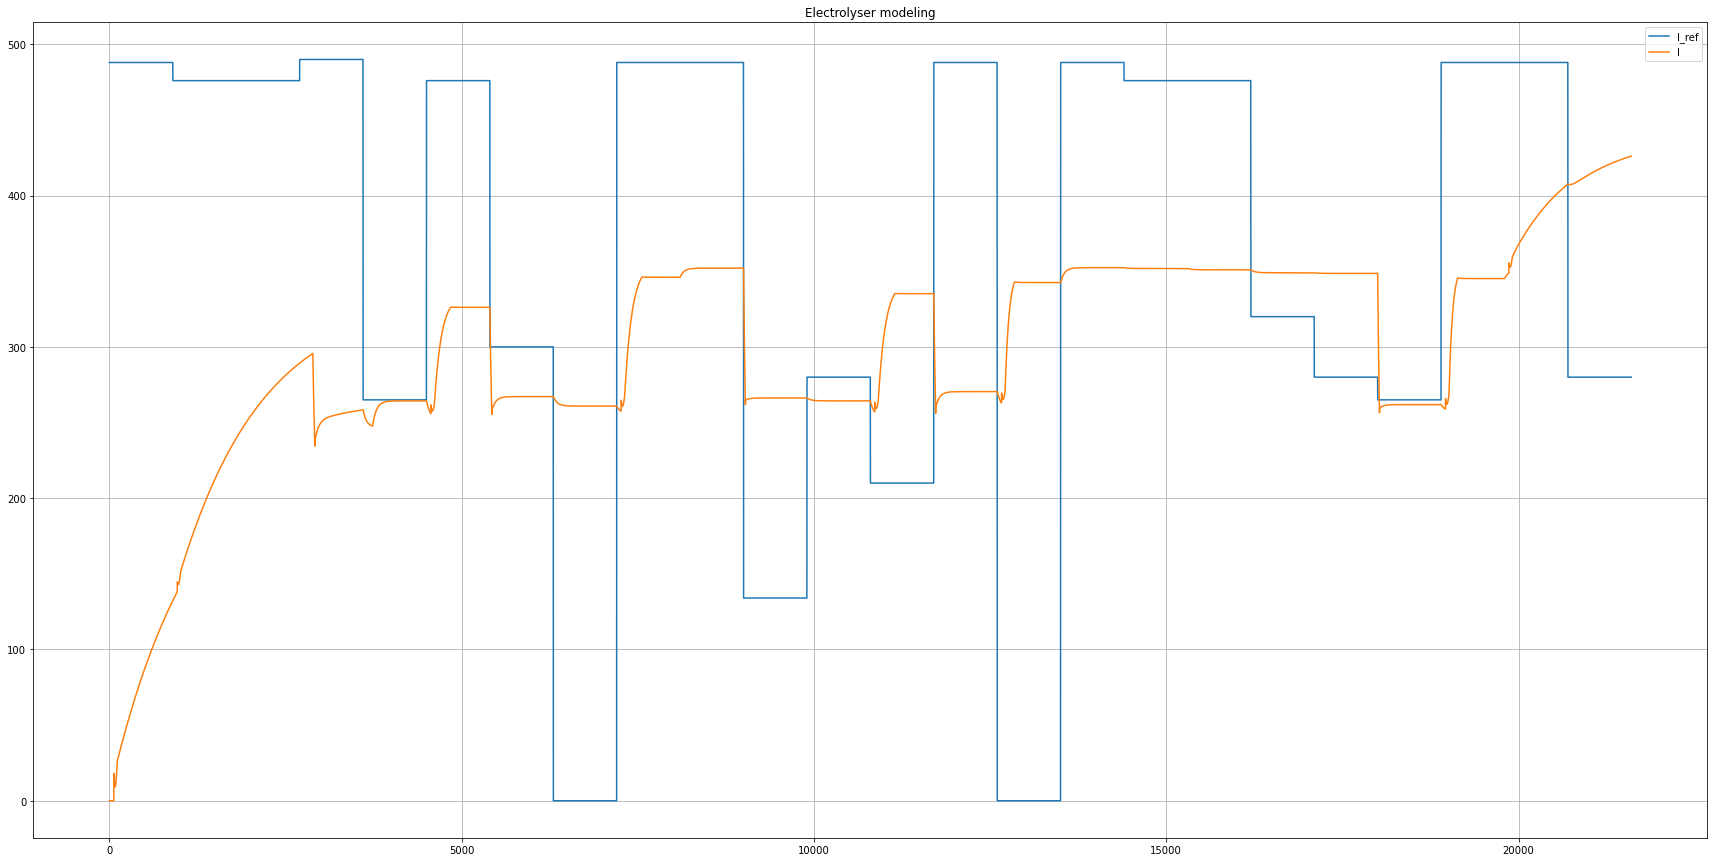

In [13]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')

plt.legend()
plt.grid(visible=True)
# сколько недозапасли от дневного потребления
# 15%

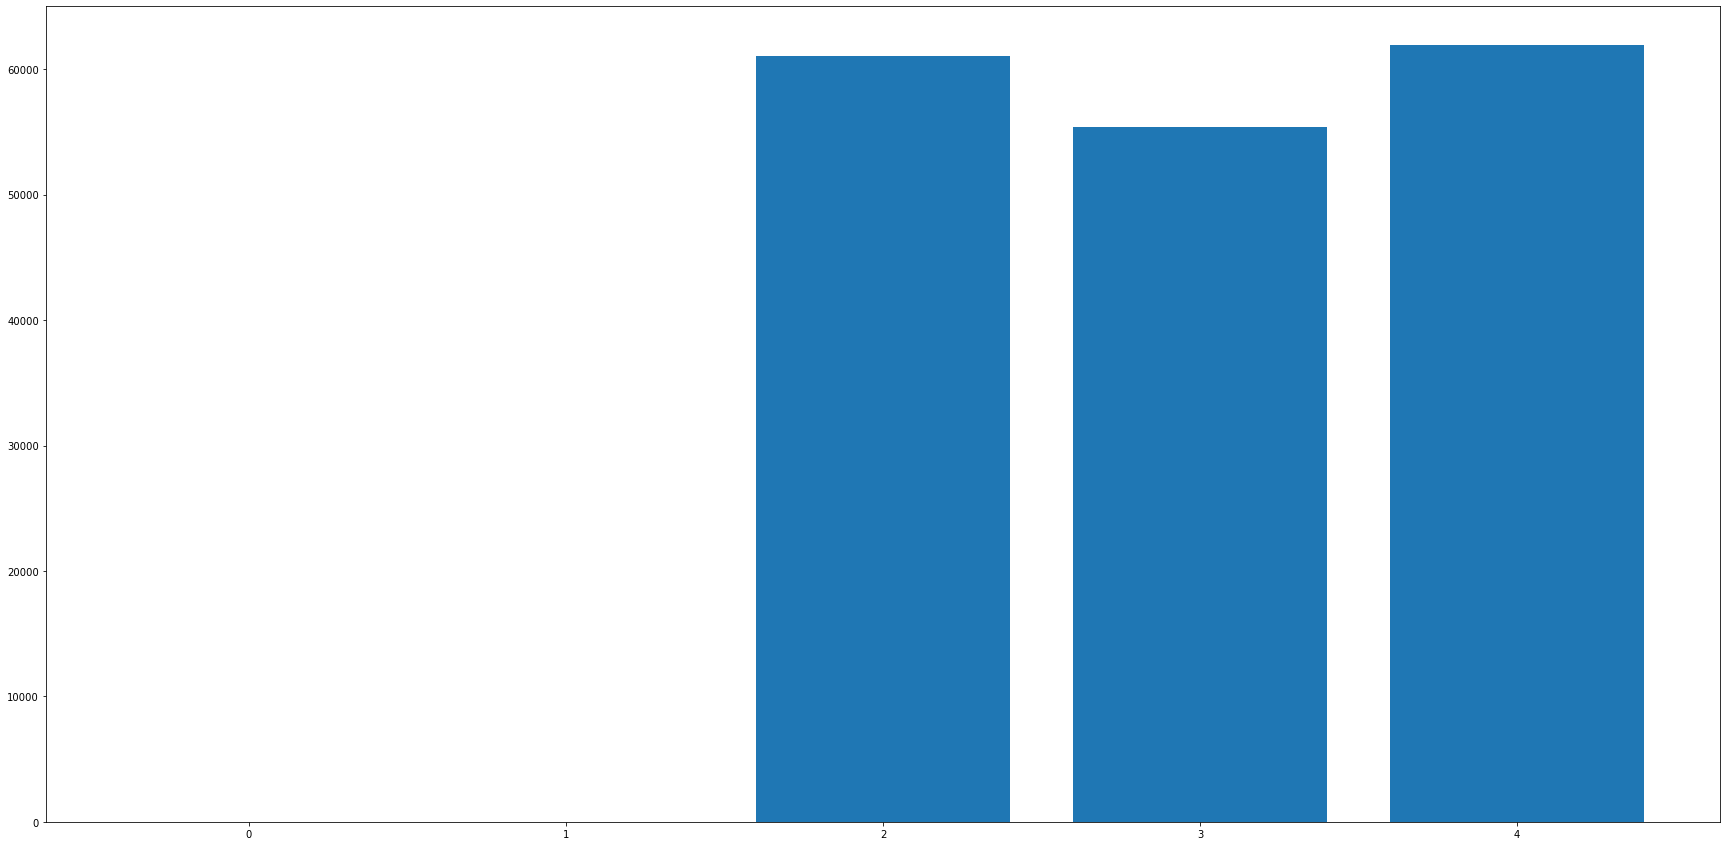

In [10]:
num_elecs = 5
names = list(range(num_elecs))
values = total_run_out_for_elecs

plt.figure(figsize=(30, 15))
plt.bar(names, values)
plt.show()

In [1]:

from pandas import read_csv



In [2]:
Irradiance_data = read_csv('experimental_data/irradiance4.csv', delimiter=';')


In [3]:
Irradiance_data

,Series,Time,Value
0,Solar Irradiance,2022-02-17T22:25:00+03:00,0.016667
1,Solar Irradiance,2022-02-17T22:30:00+03:00,0.025000
2,Solar Irradiance,2022-02-17T22:35:00+03:00,0.025333
3,Solar Irradiance,2022-02-17T22:40:00+03:00,0.031000
4,Solar Irradiance,2022-02-17T22:45:00+03:00,0.026333
...,...,...,...
822,Solar Irradiance,2022-02-20T18:55:00+03:00,0.019000
823,Solar Irradiance,2022-02-20T19:00:00+03:00,0.010667
824,Solar Irradiance,2022-02-20T19:05:00+03:00,0.016718
825,Solar Irradiance,2022-02-20T19:10:00+03:00,0.014000


In [23]:

Irradiance = Irradiance_data['Value'].to_numpy()[50:]


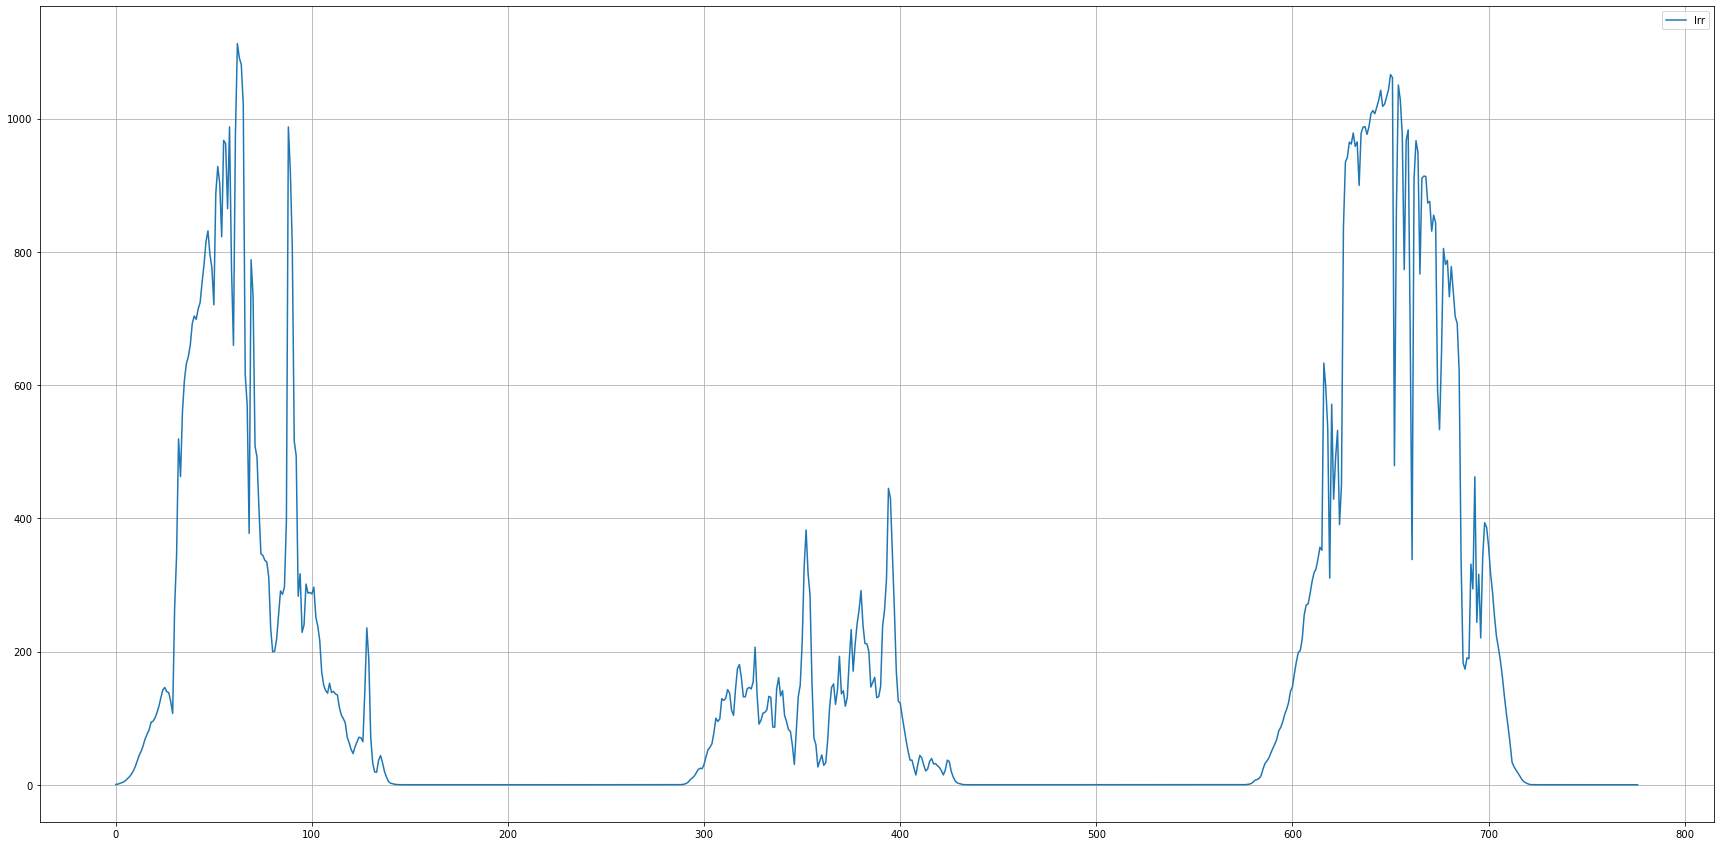

In [15]:

plt.figure(figsize=(30, 15))
plt.plot(Irradiance, label='Irr')
plt.legend()
plt.grid(visible=True)
plt.show()

In [16]:
number_of_five_minutes = Irradiance.size

In [17]:
number_of_five_minutes

777

In [18]:
 Irradiance[40]

703.697665608724

In [19]:
Irradiance_15min = []
Irradiance_1sec = []

delta_t = 1

t5 = 0

while t5 < number_of_five_minutes-3:
    quarter_of_hour = Irradiance[t5 : t5+3].mean()
    Irradiance_15min.append(quarter_of_hour)

    Irradiance_1sec.extend(quarter_of_hour * np.ones(int(15*60 / delta_t)))

    t5 += 3



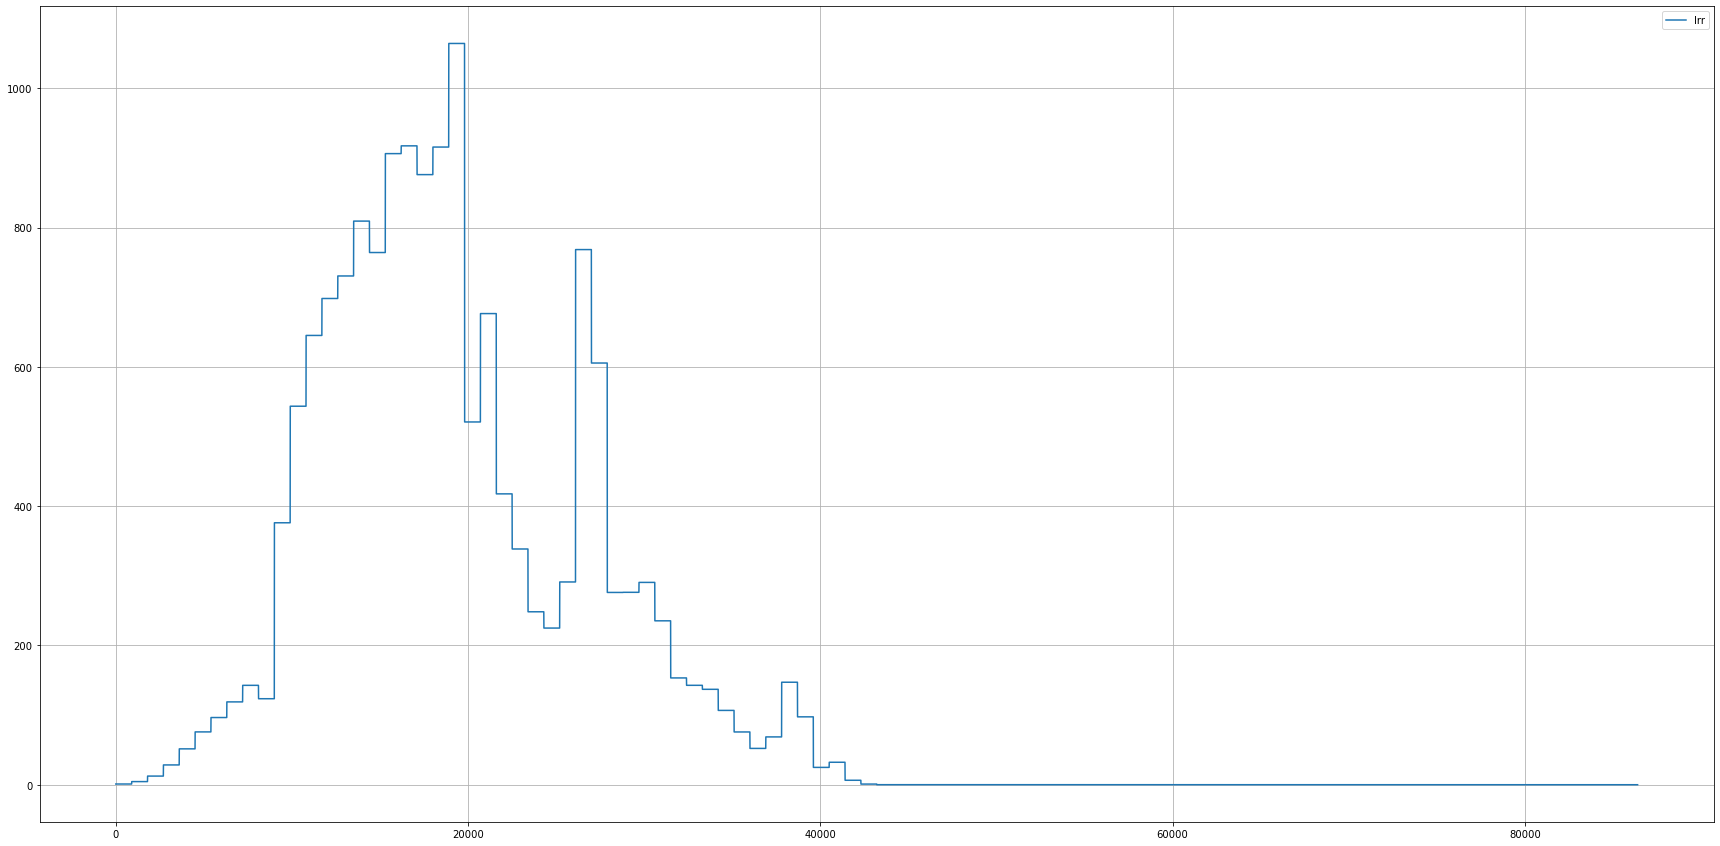

In [20]:
plt.figure(figsize=(30, 15))
plt.plot(Irradiance_1sec[:60*60*24], label='Irr')
plt.legend()
plt.grid(visible=True)
plt.show()

In [21]:
PR_experimental = np.array(Irradiance_15min) / 2

In [22]:
def Generator_of_desired_PR_from_experimental_data(i, delta_t, Delta_t, PRref, PRref_noised):
    if i != 0:
        PRref = np.delete(PRref, 0)
        PRref = np.append(PRref, [PR_experimental[int(i*delta_t / Delta_t)]])

    # зашумление
    if i % int((Delta_t/3)/delta_t) == 0: # 5 минут
        PRref_noised[0] = PRref[0]
        for k in range(1, len(PRref)): # первое значение не зашумляется, оно достоверное
            alpha = PRref[k] * 5 / 100
            PRref_k = PRref[k]#norm_sample(mu = PRref[k], sigma = alpha * k)
            extra = 0 # можно увеличить колокол, а то граничные значения имеют обрезанные колоколы
            PRref_noised[k] = max( min( PRref_k, max(values) + extra ), min(values) )

    return [PRref, PRref_noised]


In [16]:
64 * 60

3840

In [17]:
800 * 5 - 64 * 60

160